<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Machine_Learning_Clustering_Text_Model_KMeans%2CAglomerative.Kelbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning on Text: Clustering Assignment

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Ingest the company_profiles data set into a corpus.

In [4]:
path = "/content/drive/My Drive/Colab Notebooks/company_profiles"
DOC_PATTERN = r".*\.txt"

corpus = PlaintextCorpusReader(path, DOC_PATTERN)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [6]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [7]:
def preprocess(docs):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')
  preprocessed = []

  for doc in docs:
      tokenized = word_tokenize(doc)

      cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower()))
        for token in tokenized
        if not token.lower() in stopwords.words('english')
        if token.isalpha()]

      untokenized = ' '.join(cleaned)
      preprocessed.append(untokenized)
  return preprocessed

  

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [15]:
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(preprocessed)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

In [24]:
from yellowbrick.cluster import KElbowVisualizer



model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5279188d0>,
                 k=None, metric=None, model=None, timings=True)

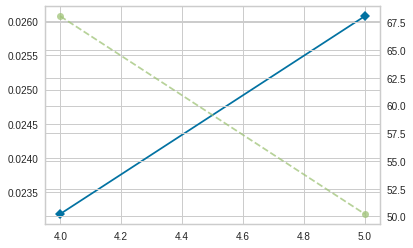

In [25]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 6), metric='silhouette')
visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [ ]:
model = Kmeans(n_clusters = 5)
clusters = model.fit_predict(vectorized)

### Perform Agglomerative Clustering using the same number of clusters.

In [26]:
model_2 = AgglomerativeClustering()
clusters_2 = model.fit_predict(vectorized.toarray())

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [27]:
from sklearn.decomposition import NMF

In [38]:
num_keywords = 5
num_topics = 10

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
for i in topic.argsort()[:-num_topics - 1:-1]]
for topic in model.components_]

topics = [[x[0] for x in i] for i in results]

In [39]:
vectorizer.get_feature_names()

['aaa',
 'aac',
 'aad',
 'aaon',
 'aar',
 'aaron',
 'aastrom',
 'aav',
 'ab',
 'abacus',
 'abak',
 'abaloparatid',
 'abanderado',
 'abandon',
 'abat',
 'abaxi',
 'abbotsford',
 'abbott',
 'abboud',
 'abbvi',
 'abc',
 'abcit',
 'abdomin',
 'abel',
 'abeona',
 'abercrombi',
 'abil',
 'abilen',
 'abilitec',
 'abington',
 'abiom',
 'abirateron',
 'abitibi',
 'abl',
 'ablat',
 'abm',
 'abnorm',
 'aboveground',
 'abra',
 'abras',
 'abraxa',
 'abraxan',
 'abroad',
 'abscess',
 'absenc',
 'absolut',
 'absorb',
 'absorpt',
 'abstract',
 'abus',
 'abx',
 'abxi',
 'ac',
 'aca',
 'acacia',
 'academ',
 'academi',
 'academia',
 'academicwork',
 'academisch',
 'acadia',
 'acap',
 'acc',
 'acceler',
 'acceleromet',
 'acceleron',
 'accent',
 'accept',
 'acceptor',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'acco',
 'accomack',
 'accommod',
 'accompani',
 'accomplish',
 'accor',
 'accord',
 'accordantcar',
 'account',
 'accredit',
 'accret',
 'accrual',
 'accud',
 'accudart',
 'accumul